In [1]:
import os
import re
from matplotlib import pyplot as plt
import numpy as np


def extract_elapsed_time(file_path):
    """Extract elapsed runtime from the given file."""
    with open(file_path, 'r') as file:
        for line in file:
            if "Elapsed runtime" in line:
                # Extract the time in HH:MM:SS format
                match = re.search(r'(\d{2}):(\d{2}):(\d{2})', line)
                if match:
                    hours, minutes, seconds = map(int, match.groups())
                    # Convert to seconds
                    return hours * 3600 + minutes * 60 + seconds
    return None

def analyze_log_files(directory):
    """Analyze all .out files in the directory and extract runtimes as seconds."""
    runtimes = {}
    for filename in os.listdir(directory):
        if filename.endswith('.out'):
            file_path = os.path.join(directory, filename)
            elapsed_seconds = extract_elapsed_time(file_path)
            if elapsed_seconds is not None:
                runtimes[filename] = elapsed_seconds
    return runtimes

def hist_runtimes_from_logs(path):
    runtimes = analyze_log_files(path)
    plt.hist(np.array(list(runtimes.values())) / 60)
    plt.xlabel("runtime [min]")
    plt.suptitle(os.path.basename(path) + f"    {len(runtimes.values())} jobs")
    plt.show()

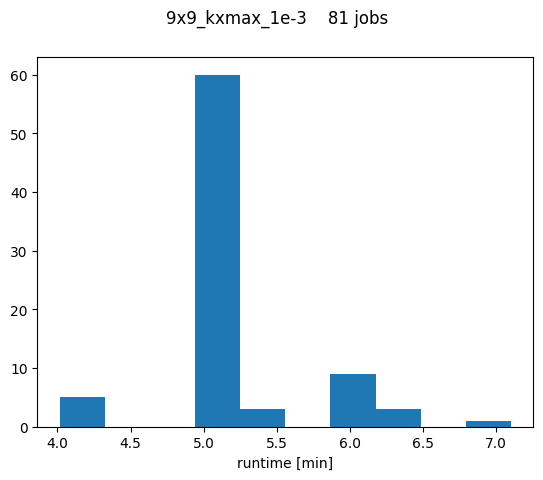

In [2]:
hist_runtimes_from_logs('/home/atuin/b228da/b228da10/dirac/T2_inf/9x9_kxmax_1e-3')

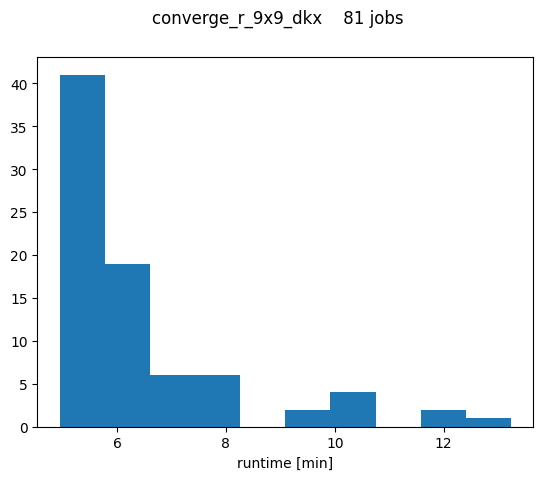

In [2]:
hist_runtimes_from_logs('/home/atuin/b228da/b228da10/dirac/T2_inf/converge_r_9x9_dkx')